In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sps


time_file = open('time.txt')
data = time_file.readlines()
inp = [float(data[i]) for i in range (len(data))]
time_file.close()

lambd = inp[0]
fales_time = inp[1:]
print(fales_time)
print(lambd)

[8.22, 9.209, 13.517, 18.911, 20.443, 21.369, 24.409, 27.178, 28.647, 33.677, 35.176, 36.973, 38.085, 46.158, 48.238, 50.226, 51.098, 52.693, 54.131, 58.926]
0.342


Сопряженное к экспоненциальному - это гамма-распределение с параметрами $(\alpha, \beta)$

Байесовская оценка $\lambda$ при этом равна $\frac{\alpha + n - 1}{\beta + \Sigma X_i}$

Так как наша $\lambda$ лежит в окрестности 0.35, то рассмотрим [[1.,1.],[1.,0.3],[0.35, 1],[1.,0.35]] 

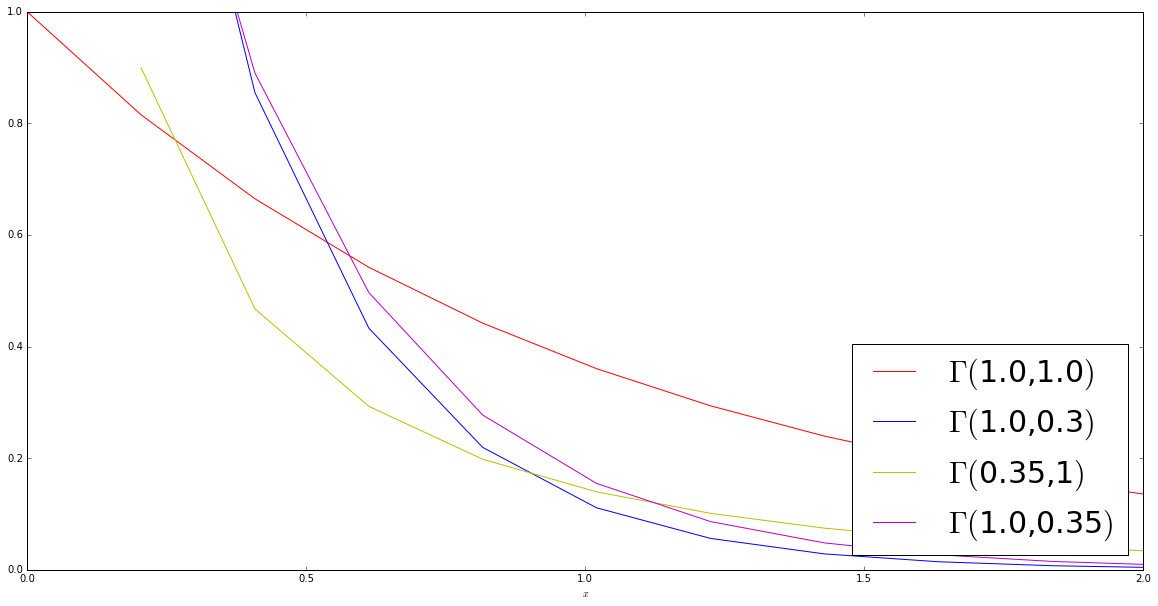

In [97]:
params = [[1.,1.],[1.,0.3],[0.35, 1],[1.,0.35]]  
X = np.linspace(0,10)
colors = ['r','b','y','m']
plt.figure(figsize=(20, 10))
for i in range(4):
    param = params[i]
    Y = sps.gamma.pdf(a=param[0],scale=param[1],x=X)
    plt.plot(X,Y,label=r'$\Gamma($'+str(param[0])+',' + str(param[1])+'$)$ ',color=colors[i])
plt.legend(loc='lower right', prop={'size':30})
plt.xlabel(r'$x$')
plt.ylim(0, 1)
plt.xlim(0,2)
plt.show()


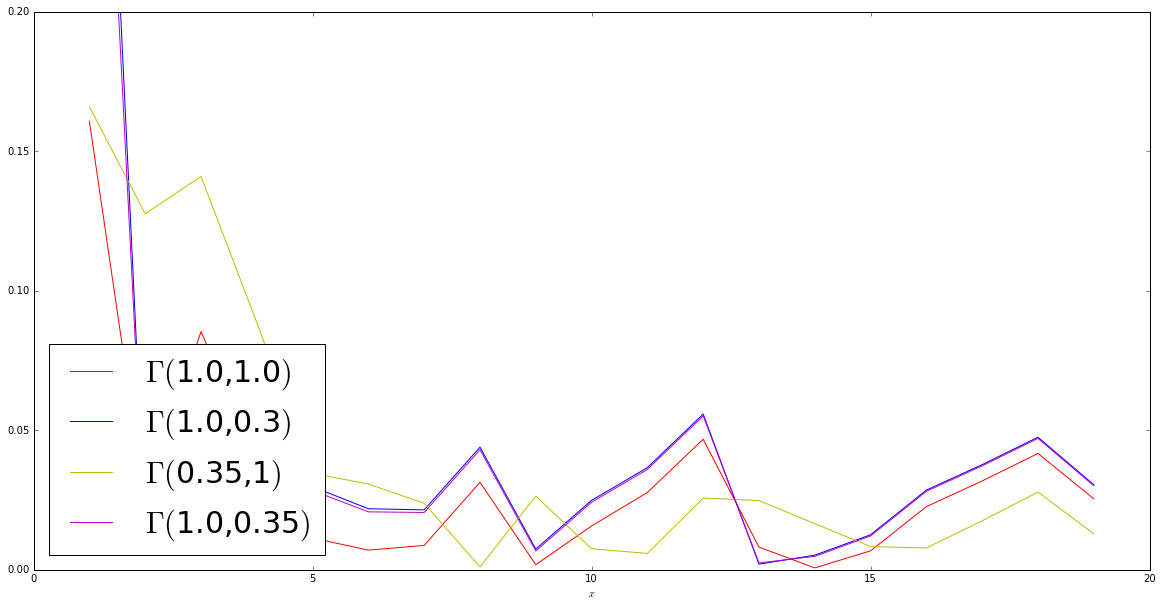

In [102]:
def bayes_estimation(X, param):
    alp,bet = param
    return float(alp + float(len(X) - 1))/(bet + float(sum(X)))

N = len(fales_time)
A_X = np.arange(1, N)
plt.figure(figsize=(20, 10))
D = [fales_time[i+1] - fales_time[i] for i in range(N - 1)]
for i in range(4):
    param = params[i]
    B = [bayes_estimation(D[0:k+1],param) for k in range(N - 1)]
    plt.plot(A_X,np.abs(np.add(B, -lambd)),color=colors[i],
             label=r'$\Gamma($'+str(param[0])+',' + str(param[1])+'$)$ ')
plt.legend(loc='lower left', prop={'size':30})
plt.xlabel(r'$x$')
plt.ylim(0, 0.2)
plt.show()

Лучше всего оценивает $\lambda$  $\Gamma(0.35, 1)$ что логично, ведь $\mathbb{E}[X] = \alpha{\beta} = 0.35$ , $\mathbb{D}[X] =\alpha{\beta^2} = 0.35$

Возьмём априорные распределения $\Gamma(0.35,1)$  и  $\Gamma(1,1)$

In [107]:
import time
params =[[1,1],[0.35,1]]
sec_amount = 61
t_0 = 60
N = [np.sum([(b <= t) for b in fales_time]) for t in range(61)]

last_break = 0
error1 = 0
error2 = 0
for t in range(sec_amount):
    lambd1 = bayes_estimation(D[0:N[t]+1],params[0])
    lambd2 = bayes_estimation(D[0:N[t]+1], params[1])

    prediction1 = N[t] + lambd1 * (t_0 - t)
    prediction2 = N[t] + lambd2 * (t_0 - t)
    error1 += abs(lambd1 - lambd)**2
    error2 += abs(lambd2 - lambd)**2
    print(t, round(prediction1,3), round(prediction2,3), sep=' ')
print((error1/t)**0.5, (error2/t)**0.5)

0 30.166 10.558
1 29.663 10.382
2 29.16 10.206
3 28.658 10.03
4 28.155 9.854
5 27.652 9.678
6 27.149 9.502
7 26.647 9.326
8 26.144 9.15
9 17.198 11.934
10 14.83 12.05
11 14.574 11.849
12 14.317 11.648
13 14.061 11.447
14 16.915 14.654
15 16.613 14.401
16 16.31 14.147
17 16.008 13.894
18 15.705 13.641
19 18.489 16.605
20 18.135 16.298
21 18.613 17.139
22 19.328 18.09
23 18.977 17.772
24 18.627 17.454
25 20.068 19.006
26 19.694 18.663
27 19.321 18.32
28 18.886 18.099
29 20.089 19.368
30 19.731 19.034
31 19.373 18.699
32 19.016 18.365
33 18.658 18.03
34 19.612 19.044
35 19.243 18.697
36 20.331 19.826
37 19.679 19.295
38 19.345 18.978
39 20.168 19.835
40 19.826 19.509
41 19.485 19.184
42 19.144 18.858
43 18.802 18.533
44 18.461 18.207
45 18.12 17.882
46 17.778 17.557
47 18.534 18.338
48 18.185 18.004
49 19.011 18.848
50 18.646 18.498
51 19.365 19.236
52 20.07 19.959
53 20.572 20.484
54 20.205 20.129
55 20.837 20.774
56 20.47 20.42
57 20.102 20.065
58 19.735 19.71
59 20.367 20.355
60 20.0 2

В противоречие предположению, $\Gamma(1, 1)$ оценивает  $\lambda$ со среднеквадратичным отклонением около 0.07, что в превосходит  $\Gamma(0,35, 1)$